<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/ML-Manuel/RF%26LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PreProcessing

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

In [189]:
!git clone -b ML-Manuel https://github.com/ManuelBagasina/DATCapstone.git
%cd DATCapstone/data

fatal: destination path 'DATCapstone' already exists and is not an empty directory.
/content/DATCapstone/data/DATCapstone/data/DATCapstone/data


In [190]:
from zipfile import ZipFile
import pandas as pd

# Explicitly extract data.csv from ZIP
with ZipFile('_data.csv.zip', 'r') as z:
    with z.open('data.csv') as f:  # Ignore macOS metadata files
        df = pd.read_csv(f, index_col=0)

# Convert date and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])


In [191]:


df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,emb_763,emb_764,emb_765,emb_766,emb_767,Target_1day,Target_1week,Target_1month,Target_1year,Ticker
149,2021-09-30,140.983670,141.690258,138.648004,138.863907,89056700,0.0,0.0,23921.991,4.7,...,NaN,NaN,NaN,NaN,NaN,1.128571,1.756653,10.863785,9.008606,AAPL
152,2021-10-01,139.256450,140.257452,136.518433,139.992477,94639600,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,-3.444626,0.245331,7.016815,0.616699,AAPL
155,2021-10-04,139.119037,139.560665,135.694064,136.547852,98322000,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,1.933334,3.601639,9.637100,-0.162491,AAPL
158,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,0.873398,0.392532,8.744034,2.098389,AAPL
161,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,1.265976,-1.069687,9.313263,4.827057,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,2025-01-27,394.799988,406.690002,389.000000,397.149994,58125500,0.0,0.0,29723.864,4.0,...,1.174326,-0.262426,0.298183,0.182200,0.388200,0.940002,NaN,NaN,NaN,TSLA
8072,2025-01-28,396.910004,400.589996,386.500000,398.089996,48910700,0.0,0.0,29723.864,4.0,...,0.084330,-0.354550,-0.611864,-0.449780,0.584349,-8.989990,NaN,NaN,NaN,TSLA
8082,2025-01-29,395.209991,398.589996,384.480011,389.100006,68033600,0.0,0.0,29723.864,4.0,...,0.827862,-0.620100,-0.024186,-0.439615,0.781107,11.179993,NaN,NaN,NaN,TSLA
8092,2025-01-30,410.779999,412.500000,384.410004,400.279999,98092900,0.0,0.0,29723.864,4.0,...,1.383147,-0.616897,-0.145329,-0.418483,0.636253,4.320007,NaN,NaN,NaN,TSLA


In [192]:
#Read Data
# df = pd.read_csv('/Users/wonminkim/Projects/DATCapstone/data2/data.csv', index_col=0)
# Correct path for ZIP file
zip_path = '/content/DATCapstone/data/_data.csv.zip'

# Extract specific file from ZIP
with ZipFile(zip_path, 'r') as z:
    with z.open('data.csv') as f:  # Explicitly specify the file to extract
        df = pd.read_csv(f, index_col=0)


df['Date'] = pd.to_datetime(df['Date'])

#Forward fill -> micro, macro, stock / fill na -> sentiment
df[df.columns[1:40]] = df.groupby('Ticker')[df.columns[1:40]].ffill()
df[df.columns[40:-5]] = df[df.columns[40:-5]].fillna(0)

df = df.dropna(subset=df.columns[0:-5])

# Sorting
df = df.sort_values(by=['Ticker', 'Date']).reset_index(drop=True)

# Lag feature (Exclude embedding columns)
lag_cols = df.columns[1:44]
lags = [1, 3, 5, 7, 14, 30]
lag_features = []

for col in lag_cols:
    for lag in lags:
        lagged = df.groupby('Ticker')[col].shift(lag)
        lag_features.append(lagged.rename(f'{col}_lag{lag}'))

lag_df = pd.concat(lag_features, axis=1)

df = pd.concat([df.reset_index(drop=True), lag_df.reset_index(drop=True)], axis=1)

In [193]:
import glob
import pandas as pd

# Correct path for article CSVs in Google Colab
csv_files = glob.glob('/content/DATCapstone/data/*articles*.csv')
print("Found files:", csv_files)  # Debugging


Found files: ['/content/DATCapstone/data/MSFT_articles..csv', '/content/DATCapstone/data/AAPL_articles.csv', '/content/DATCapstone/data/ADBE_articles.csv', '/content/DATCapstone/data/AVGO_articles..csv', '/content/DATCapstone/data/AMZN_articles..csv', '/content/DATCapstone/data/META_articles..csv', '/content/DATCapstone/data/NFLX_articles..csv', '/content/DATCapstone/data/TSLA_articles..csv', '/content/DATCapstone/data/GOOGL_articles..csv', '/content/DATCapstone/data/NVDA_articles..csv']


In [194]:
!ls /content/DATCapstone/data/*articles*.csv


/content/DATCapstone/data/AAPL_articles.csv
/content/DATCapstone/data/ADBE_articles.csv
/content/DATCapstone/data/AMZN_articles..csv
/content/DATCapstone/data/AVGO_articles..csv
/content/DATCapstone/data/GOOGL_articles..csv
/content/DATCapstone/data/META_articles..csv
/content/DATCapstone/data/MSFT_articles..csv
/content/DATCapstone/data/NFLX_articles..csv
/content/DATCapstone/data/NVDA_articles..csv
/content/DATCapstone/data/TSLA_articles..csv


In [195]:
if not csv_files:
    print("No article files found. Initializing empty columns.")
    df_articles = pd.DataFrame(columns=['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral', 'Articles_positive'])
else:
    # Your existing processing code
    df_articles_list = []
    for file in csv_files:
        ticker = os.path.basename(file).split('_')[0]
        df_articles = pd.read_csv(file)
        df_articles['Ticker'] = ticker
        df_articles_list.append(df_articles)

    df_articles = pd.concat(df_articles_list, ignore_index=True)

    # Preprocessing steps...
# Articles dataframe preprocessing
df_articles["Date"] = pd.to_datetime(df_articles["time"], errors='coerce', utc=True).dt.tz_convert(None).dt.date
df_articles = df_articles[['Date', 'Ticker', 'sentiment']]
sentiment_dummies = pd.get_dummies(df_articles['sentiment'])
df_encoded = pd.concat([df_articles[['Date', 'Ticker']], sentiment_dummies], axis=1)
df_articles = df_encoded.groupby(['Date', 'Ticker']).sum().reset_index()
df_articles['Date'] = pd.to_datetime(df_articles['Date'])

df_articles['articles_avg_sentiment'] = (df_articles['Negative'] * -1 + df_articles['Neutral'] * 0 + df_articles['Positive']) / (df_articles['Negative'] + df_articles['Neutral'] + df_articles['Positive'])
df_articles.columns = ['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral', 'Articles_positive', 'Articles_avg_sentiment']
df_articles

df = pd.merge(df, df_articles, on=['Date', 'Ticker'], how = 'left')

# Fill 0 except the target columns
df[[col for col in df.columns if 'Target' not in col]] = df[[col for col in df.columns if 'Target' not in col]].fillna(0)

In [196]:
import glob

# Read articles df
csv_files = glob.glob(os.path.join("*_articles*.csv")) # Updated to reflect file naming pattern

df_articles_list = []

for file in csv_files:
    # get ticker from filename
    ticker = os.path.basename(file).split('_')[0]
    df_articles = pd.read_csv(file)
    df_articles['Ticker'] = ticker
    df_articles_list.append(df_articles)

# concat articles dataframe
df_articles = pd.concat(df_articles_list, ignore_index=True)

# Articles dataframe preprocessing
df_articles["Date"] = pd.to_datetime(df_articles["time"], errors='coerce', utc=True).dt.tz_convert(None).dt.date
df_articles = df_articles[['Date', 'Ticker', 'sentiment']]
sentiment_dummies = pd.get_dummies(df_articles['sentiment'])
df_encoded = pd.concat([df_articles[['Date', 'Ticker']], sentiment_dummies], axis=1)
df_articles = df_encoded.groupby(['Date', 'Ticker']).sum().reset_index()
df_articles['Date'] = pd.to_datetime(df_articles['Date'])

df_articles['articles_avg_sentiment'] = (df_articles['Negative'] * -1 + df_articles['Neutral'] * 0 + df_articles['Positive']) / (df_articles['Negative'] + df_articles['Neutral'] + df_articles['Positive'])
df_articles.columns = ['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral', 'Articles_positive', 'Articles_avg_sentiment']
df_articles

df = pd.merge(df, df_articles, on=['Date', 'Ticker'], how = 'left')

# Fill 0 except the target columns
df[[col for col in df.columns if 'Target' not in col]] = df[[col for col in df.columns if 'Target' not in col]].fillna(0)

In [197]:
print(df_articles.columns)

Index(['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral',
       'Articles_positive', 'Articles_avg_sentiment'],
      dtype='object')


# ML Linear


In [159]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=0.95, random_state=42)
emb_cols = [col for col in df.columns if col.startswith("emb_")]
X_emb = df[emb_cols]
X_emb_pca = pca.fit_transform(X_emb)

# PCA columns
pca_columns = [f"emb_pca_{i}" for i in range(X_emb_pca.shape[1])]
df_pca_part = pd.DataFrame(X_emb_pca, columns=pca_columns, index=df.index)
df_non_pca = df.drop(columns=emb_cols)

df_pca = pd.concat([df_non_pca.reset_index(drop=True), df_pca_part.reset_index(drop=True)], axis=1)

# 결과 확인
df_pca.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,emb_pca_74,emb_pca_75,emb_pca_76,emb_pca_77,emb_pca_78,emb_pca_79,emb_pca_80,emb_pca_81,emb_pca_82,emb_pca_83
0,2021-09-30,140.983670,141.690258,138.648004,138.863907,89056700,0.0,0.0,23921.991,4.7,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
1,2021-10-01,139.256450,140.257452,136.518433,139.992477,94639600,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
2,2021-10-04,139.119037,139.560665,135.694064,136.547852,98322000,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def random_forest(data, target):
    df = data.copy()
    remove_target_col = [col for col in df.columns if 'Target' in col]
    remove_target_col.remove(target)

    # Drop other Targets and NaNs
    df = df.drop(columns=remove_target_col)
    df = df.dropna(subset=[target])

    # Date processing
    df['Date'] = pd.to_datetime(df['Date'])

    # One-hot encode Ticker
    df = pd.get_dummies(df, columns=['Ticker'], drop_first=True)

    # X, y
    y = df[target]
    X = df.drop(columns=['Date', target])

    # Standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    }

    # GridSearchCV
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                               param_grid,
                               cv=3,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1,
                               verbose=1)

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print("Best Parameters:")
    print(grid_search.best_params_)

    # Prediction
    y_pred = best_model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Visualization
    test_index = np.arange(len(y_test))
    plt.figure(figsize=(14, 6))
    plt.plot(test_index, y_test.values, label='Actual', linewidth=2)
    plt.plot(test_index, y_pred, label='Predicted', linewidth=2)
    plt.title(f'{target}: Actual vs Predicted')
    plt.xlabel('Test Sample Index')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters:
{'max_depth': 20, 'n_estimators': 100}

 Evaluation:
Mean Squared Error (MSE): 20.3420
Mean Absolute Error (MAE): 2.9514
R² Score: -0.5414


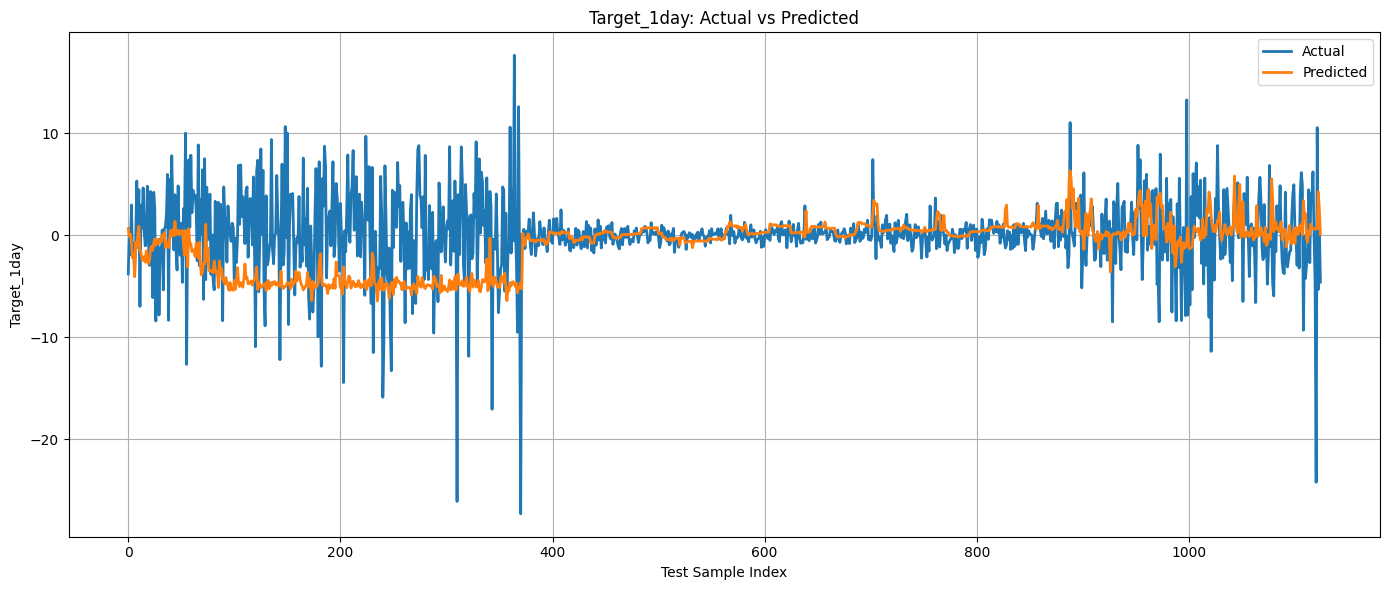

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters:
{'max_depth': 10, 'n_estimators': 100}

 Evaluation:
Mean Squared Error (MSE): 50.5446
Mean Absolute Error (MAE): 4.9216
R² Score: 0.1119


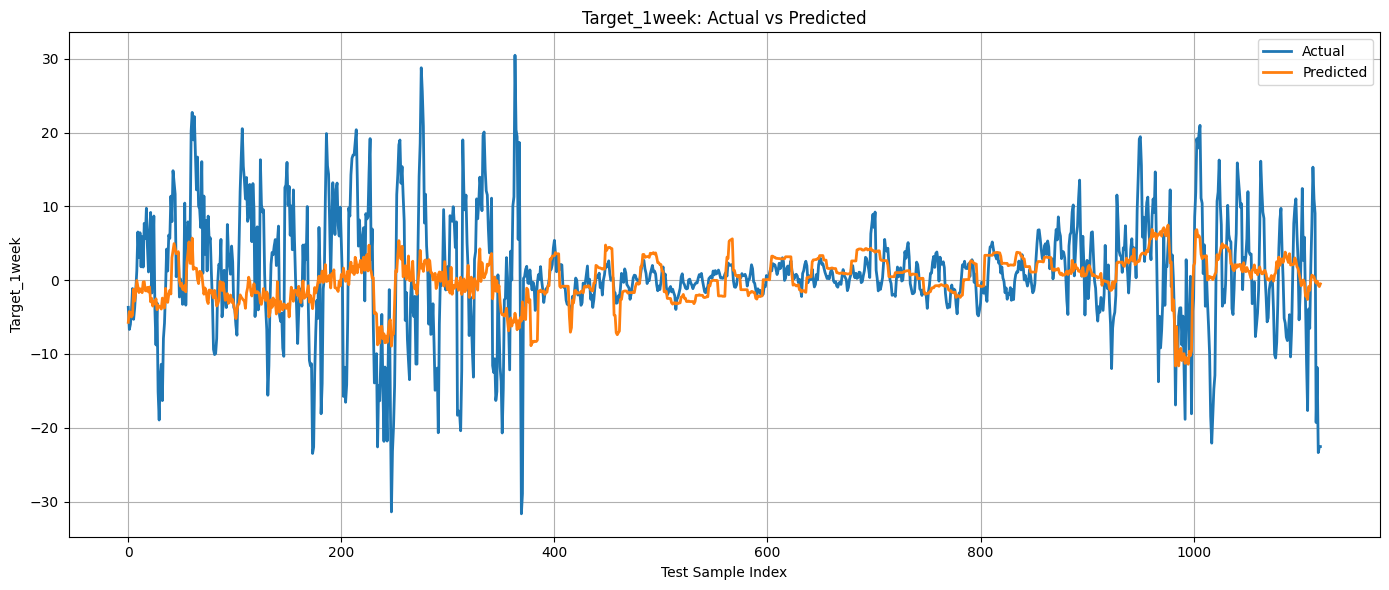

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters:
{'max_depth': None, 'n_estimators': 100}

 Evaluation:
Mean Squared Error (MSE): 179.8273
Mean Absolute Error (MAE): 9.6425
R² Score: 0.0685


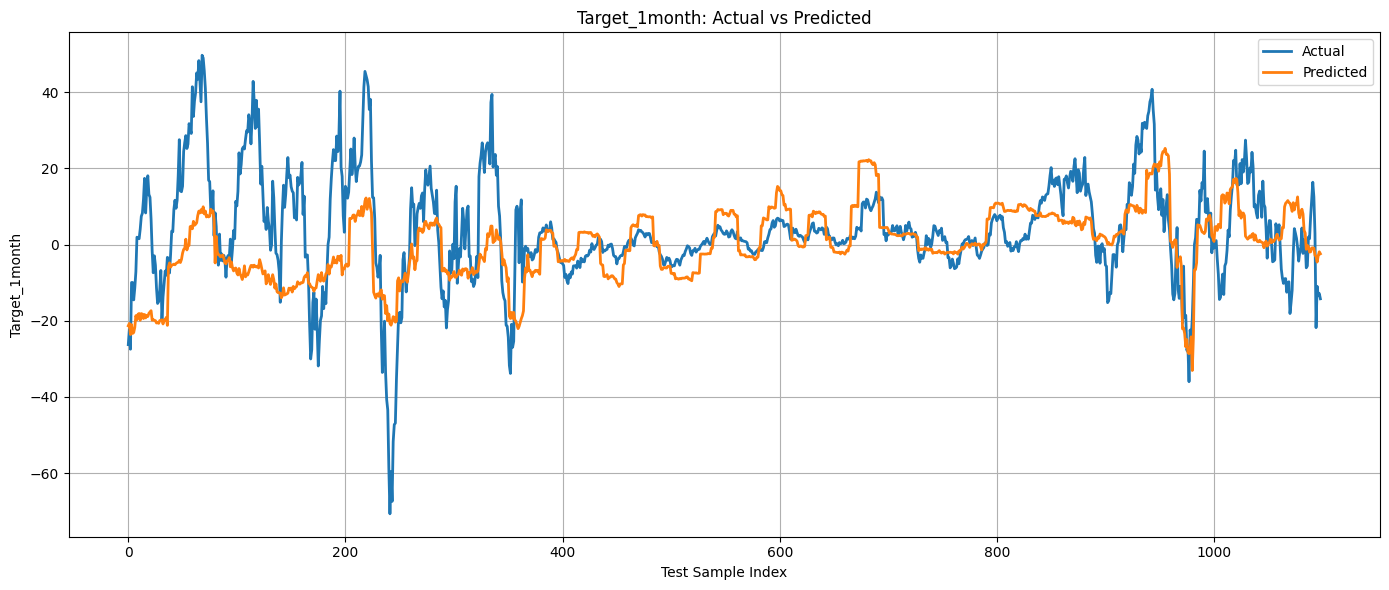

Fitting 3 folds for each of 6 candidates, totalling 18 fits


KeyboardInterrupt: 

In [ ]:
random_forest(df, 'Target_1day')
random_forest(df, 'Target_1week')
random_forest(df, 'Target_1month')
random_forest(df, 'Target_1year')

In [ ]:
random_forest(df_pca, 'Target_1day')
random_forest(df_pca, 'Target_1week')
random_forest(df_pca, 'Target_1month')
random_forest(df_pca, 'Target_1year')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

def lightgbm_model(data, target):
    df = data.copy()

    # Target setting
    remove_target_col = [col for col in df.columns if 'Target' in col]
    remove_target_col.remove(target)
    df = df.drop(columns=remove_target_col)
    df = df.dropna(subset=[target])

    df['Date'] = pd.to_datetime(df['Date'])

    # Ticker encoding
    df = pd.get_dummies(df, columns=['Ticker'], drop_first=True)

    # X, y
    y = df[target]
    X = df.drop(columns=['Date', target])

    # Standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    # Hyperparameter
    param_grid = {
        'num_leaves': [31, 63],
        'max_depth': [-1, 10, 20],
        'learning_rate': [0.1, 0.01],
        'n_estimators': [100, 200]
    }

    # GridSearchCV
    model = lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbosity=-1)
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               cv=3,
                               scoring='neg_mean_squared_error',
                               verbose=0,
                               n_jobs=-1)

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print("Best Parameters:")
    print(grid_search.best_params_)

    # Prediction
    y_pred = best_model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Visualization
    test_index = np.arange(len(y_test))
    plt.figure(figsize=(14, 6))
    plt.plot(test_index, y_test.values, label='Actual', linewidth=2)
    plt.plot(test_index, y_pred, label='Predicted', linewidth=2)
    plt.title(f'{target}: Actual vs Predicted (LightGBM)')
    plt.xlabel('Test Sample Index')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
lightgbm_model(df, 'Target_1day')
lightgbm_model(df, 'Target_1week')
lightgbm_model(df, 'Target_1month')
lightgbm_model(df, 'Target_1year')

In [ ]:
lightgbm_model(df_pca, 'Target_1day')
lightgbm_model(df_pca, 'Target_1week')
lightgbm_model(df_pca, 'Target_1month')
lightgbm_model(df_pca, 'Target_1year')

# TFT

## Functional, needs improvement

In [280]:
print(df.columns)

Index(['Date', 'Ticker', 'Target_1day', 'Open', 'High', 'Low', 'Close',
       'Volume', 'GDP (Billions USD)', 'Unemployment Rate (%)',
       ...
       'emb_762', 'emb_763', 'emb_764', 'emb_765', 'emb_766', 'emb_767',
       'time_idx', 'Target_1week', 'Target_1month', 'Target_1year'],
      dtype='object', length=785)


In [281]:
#!pip install pytorch_forecasting
#!pip install lightning

In [282]:
import torch
import pytorch_lightning as pl
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor, ModelCheckpoint
from pytorch_forecasting.data.encoders import GroupNormalizer
from pytorch_forecasting.metrics import QuantileLoss
from sklearn.decomposition import PCA

In [283]:
# Data Prep
required_columns = ['Date', 'Ticker', 'Target_1day', 'Open', 'High', 'Low', 'Close',
                   'Volume', 'GDP (Billions USD)', 'Unemployment Rate (%)',
                   'positive', 'neutral', 'negative'] + [f"emb_{i}" for i in range(768)]

df = df[required_columns].sort_values(by=['Ticker', 'Date'])

# Create time index
df["time_idx"] = df.groupby("Ticker").cumcount()


In [284]:
# BEFORE creating TimeSeriesDataSet
# Calculate all targets properly
target_periods = {
    'Target_1day': 1,
    'Target_1week': 5,
    'Target_1month': 20,
    'Target_1year': 250
}

for target, period in target_periods.items():
    df[target] = df.groupby('Ticker')['Close'].transform(
        lambda x: x.shift(-period) - x
    )
    # Fill remaining NaNs at group boundaries
    df[target] = df.groupby('Ticker')[target].transform(
        lambda x: x.ffill().bfill().fillna(0)
    )


In [285]:
# Create proper time indices
df = df.sort_values(['Ticker', 'Date'])
df['time_idx'] = df.groupby('Ticker').cumcount()


In [286]:
# Define TimeSeriesDataSet ⚙️
max_encoder_length = 63  # 30-day lookback window
max_prediction_length = 5  # 1-day prediction

training_cutoff = int(df["time_idx"].max() * 0.8)  # 80-20 time-based split

training = TimeSeriesDataSet(
    df[df.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="Target_1day",
    group_ids=["Ticker"],
    static_categoricals=["Ticker"],
    time_varying_known_reals=[
        'Open', 'High', 'Low', 'Volume',
        'GDP (Billions USD)', 'Unemployment Rate (%)'
    ],
    time_varying_unknown_reals=[
        'Close', 'positive', 'negative', 'neutral'
    ] + [f"emb_{i}" for i in range(768)],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    target_normalizer=GroupNormalizer(groups=["Ticker"], transformation="softplus"),
)

In [287]:
# Dataloaders
batch_size = 64
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=4)
val_dataloader = training.to_dataloader(train=False, batch_size=batch_size, num_workers=4)

In [288]:
tft = TemporalFusionTransformer.from_dataset(
    training,
    hidden_size=64,  # Increased capacity
    lstm_layers=2,  # Deeper temporal processing
    attention_head_size=4,  # Multi-head attention
    dropout=0.3,  # Regularization
    hidden_continuous_size=32,
    loss=QuantileLoss(quantiles=[0.1, 0.5, 0.9]),  # Probabilistic
    learning_rate=0.001,
    optimizer="adamw"
)


/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [289]:
# Train Model
checkpoint_callback = ModelCheckpoint(
    dirpath="checkpoints",
    filename="best-tft-{epoch}-{val_loss:.2f}",
    save_top_k=1,
    monitor="val_loss"
)

# Create ModelCheckpoint instance
trainer = pl.Trainer(
    max_epochs=100,
    accelerator="auto",  # Automatically detects GPU/TPU
    devices="auto",      # Uses all available devices
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=15, mode="min"), #added mode="min"
        LearningRateMonitor(),
        checkpoint_callback
    ],
    enable_progress_bar=True,
    enable_model_summary=True
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


### Running will take a while

In [290]:
# Evaluate Model
predictions = tft.predict(val_dataloader, mode="prediction", return_x=False) # Added parameters

# Updated line to move predictions to the CPU if needed
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)]).cpu() #.cpu() to ensure tensors are on the same device

# Check MAE
mae = (actuals - predictions.cpu()).abs().mean() # predictions.cpu() moves tensors to cpu
print(f"MAE: {mae:.2f}")

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


MAE: 2.95


### Visuals of Model Performance

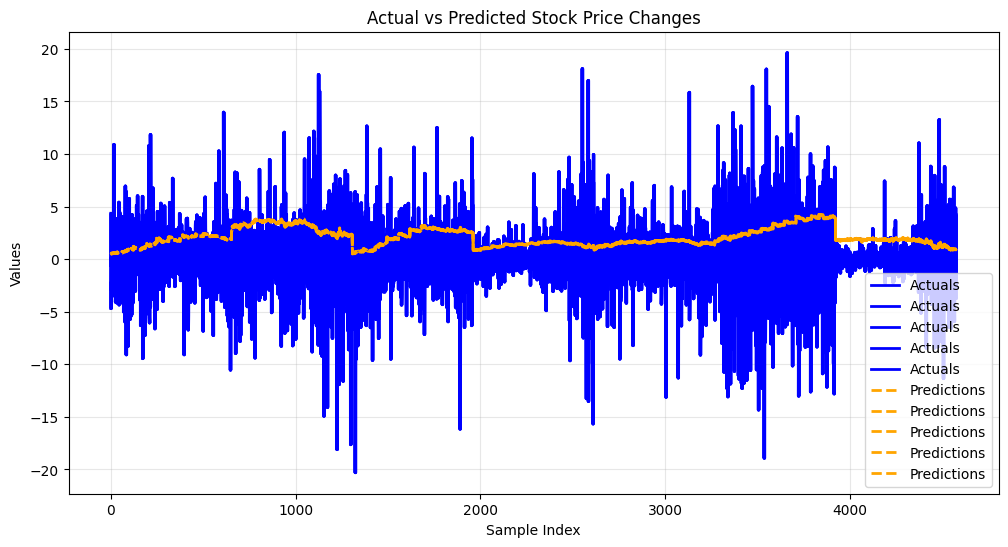

In [291]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(actuals.numpy(), label="Actuals", color="blue", linewidth=2)
plt.plot(predictions.cpu().numpy(), label="Predictions", color="orange", linestyle="--", linewidth=2) # Move predictions to CPU before converting to NumPy
plt.xlabel("Sample Index")
plt.ylabel("Values")
plt.title("Actual vs Predicted Stock Price Changes")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

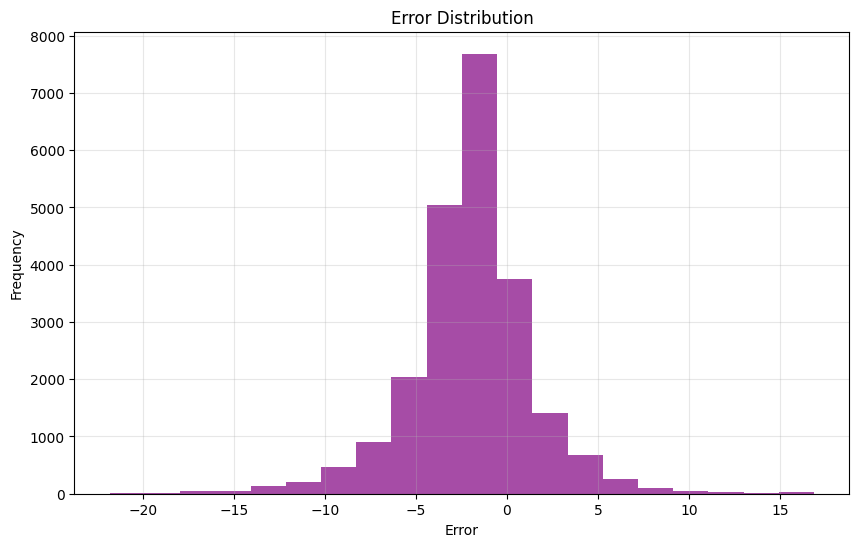

In [295]:
# Calculate errors for each column and flatten
errors_flat = (actuals.cpu().numpy() - predictions.cpu().numpy()).flatten()

# Plot error distribution
plt.figure(figsize=(10, 6))
plt.hist(errors_flat, bins=20, color="purple", alpha=0.7)  # Use the flattened errors
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.grid(alpha=0.3)
plt.show()

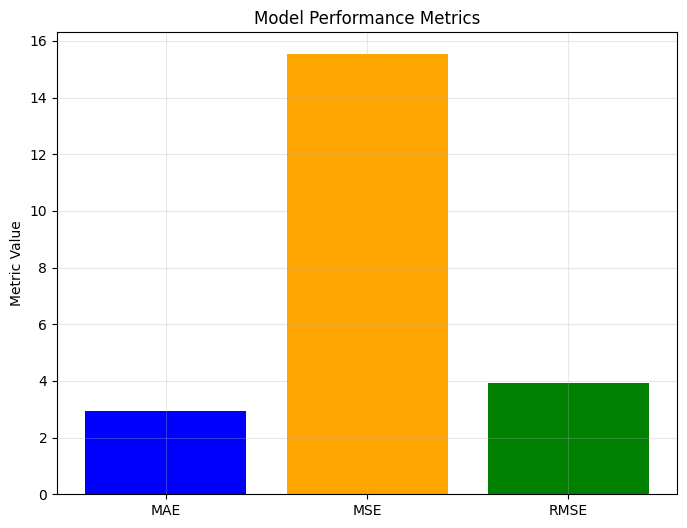

In [293]:
# Example metrics
metrics = {"MAE": mae.item(), "MSE": (errors**2).mean(), "RMSE": (errors**2).mean()**0.5}

# Plot metrics summary
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=["blue", "orange", "green"])
plt.ylabel("Metric Value")
plt.title("Model Performance Metrics")
plt.grid(alpha=0.3)
plt.show()


In [294]:
#Save Model 💾
torch.save(tft.state_dict(), "tft_model.pth")

## New TFT

### Installs

In [ ]:
# Install compatible versions
!pip install pytorch-lightning==2.0.0
!pip install pytorch-forecasting==1.0.0

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta

In [ ]:
# PyTorch Lightning and PyTorch Forecasting
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss, MAE, RMSE
from pytorch_forecasting.data import GroupNormalizer, NaNLabelEncoder

# Scikit-learn for metrics and preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

In [ ]:
# Set random seeds for reproducibility
pl.seed_everything(42)
torch.manual_seed(42)
np.random.seed(42)

### Setup

In [ ]:
# ========== 2. Resolving the NaN/Inf Target Issue ==========
# First, inspect Target_1day before any operations
print(f"Original dataframe shape: {df.shape}")
print(f"Total NaN in Target_1day: {df['Target_1day'].isna().sum()}")
print(f"Total inf in Target_1day: {np.isinf(df['Target_1day']).sum()}")

# Create a deep copy to avoid modifying the original df
working_df = df.copy()

# ====== HANDLE REMAINING NANS ======
# 1. Mark positions of original NaNs
working_df['filled_indicator'] = working_df['Target_1day'].isna().astype(float)

# 2. Fill remaining NaNs (last day of each ticker)
working_df["Target_1day"] = working_df.groupby("Ticker")["Target_1day"].transform(
    lambda x: x.ffill().bfill().fillna(0)  # Triple protection
)

# ====== VERIFY FIX ======
print(f"NaN in Target_1day after fix: {working_df['Target_1day'].isna().sum()}")
print(f"Inf in Target_1day: {np.isinf(working_df['Target_1day']).sum()}")

# =========== INSERT YOUR CODE HERE ===========
working_df["Target_1day"] = working_df.groupby("Ticker")["Close"].shift(-1) - working_df["Close"]
working_df['Target_1day'] = working_df['Target_1day'].fillna(0)
# ============================================

# Very aggressive approach to handle Target_1day
# 1. First, let's print some statistics about Target_1day
target_val = working_df['Target_1day']
print(f"\nTarget_1day stats before cleaning:")
print(f"Min: {target_val.min()}")
print(f"Max: {target_val.max()}")
print(f"Mean: {target_val.mean()}")
print(f"Std: {target_val.std()}")

# 2. Replace NaN and inf with 0 in the target column
working_df['Target_1day'] = working_df['Target_1day'].replace([np.nan, np.inf, -np.inf], 0)

# 3. Verify the target is free of NaN and inf
print(f"\nAfter replacement:")
print(f"NaN in Target_1day: {working_df['Target_1day'].isna().sum()}")
print(f"Inf in Target_1day: {np.isinf(working_df['Target_1day']).sum()}")

In [ ]:
# ========== 3. Additional Feature Checks ==========
# Create time index for TFT
working_df = working_df.sort_values(['Ticker', 'Date'])
working_df['time_idx'] = working_df.groupby('Ticker').cumcount()


# Define simple feature sets - using only crucial features that don't have NaN issues
categorical_vars = ['Ticker']

# Focus on a minimal set of relevant financial features
basic_features = [
    'Close', 'Volume', 'GDP (Billions USD)',
    'Unemployment Rate (%)', 'Consumer Confidence Index',
    'Total Revenue', 'Net Income', 'filled_indicator'
]

# Check which features exist and don't have NaN issues
valid_features = []
for col in basic_features:
    if col in working_df.columns:
        nan_count = working_df[col].isna().sum()
        inf_count = np.isinf(working_df[col]).sum()

        if nan_count > 0 or inf_count > 0:
            print(f"Feature {col}: {nan_count} NaNs, {inf_count} infs - filling with 0")
            working_df[col] = working_df[col].replace([np.nan, np.inf, -np.inf], 0)

        valid_features.append(col)

# Final features
continuous_vars = valid_features

print(f"\nSelected features:")
print(f"- Categorical ({len(categorical_vars)}): {categorical_vars}")
print(f"- Continuous ({len(continuous_vars)}): {continuous_vars}")
print(f"Total features: {len(categorical_vars) + len(continuous_vars)}")

In [ ]:
# BEFORE SPLITTING
# Calculate target within ticker groups
working_df["Target_1day"] = working_df.groupby("Ticker")["Close"].transform(
    lambda x: x.shift(-1) - x
)

# Mark and fill NaNs BEFORE split
working_df['filled_indicator'] = working_df['Target_1day'].isna().astype(float)
working_df["Target_1day"] = working_df.groupby("Ticker")["Target_1day"].transform(
    lambda x: x.ffill().bfill().fillna(0)
)

In [ ]:
# ========== 4. Create Training and Validation Sets ==========
# Split data into train and validation sets
cutoff_idx = int(0.8 * len(working_df))
train_df = working_df[working_df['time_idx'] <= cutoff_idx].copy()
val_df = working_df[working_df['time_idx'] > cutoff_idx].copy()

print(f"\nTraining data: {train_df.shape} rows, {train_df['Date'].min()} to {train_df['Date'].max()}")
print(f"Validation data: {val_df.shape} rows, {val_df['Date'].min()} to {val_df['Date'].max()}")

# Final verification - ensure there are absolutely no NaN or inf values in any used column
TARGET = "Target_1week"

print("\nFinal verification:")
for col in [TARGET] + continuous_vars:
    nan_count = train_df[col].isna().sum()
    inf_count = np.isinf(train_df[col]).sum()
    if nan_count > 0 or inf_count > 0:
        print(f"Warning: {col} still has {nan_count} NaNs and {inf_count} infs - fixing")
        train_df[col] = train_df[col].replace([np.nan, np.inf, -np.inf], 0)

    nan_count = val_df[col].isna().sum()
    inf_count = np.isinf(val_df[col]).sum()
    if nan_count > 0 or inf_count > 0:
        print(f"Warning: {col} still has {nan_count} NaNs and {inf_count} infs in validation - fixing")
        val_df[col] = val_df[col].replace([np.nan, np.inf, -np.inf], 0)

In [ ]:
# ===== CRITICAL FIX FOR TARGET NAN VALUES =====
# 1. First, check where the NaN values are
print(f"NaN values in Target_1day before fix: {train_df['Target_1day'].isna().sum()}")

# 2. Create filled_indicator BEFORE filling values (to track which values were originally missing)
train_df.loc[:, 'filled_indicator'] = train_df['Target_1day'].isna().astype(float)
val_df.loc[:, 'filled_indicator'] = val_df['Target_1day'].isna().astype(float)

# 3. Fix the Target_1day values by grouping by Ticker
# This is critical - we need to calculate shifts within each ticker group
for ticker in train_df['Ticker'].unique():
    # Get indices for this ticker
    train_idx = train_df['Ticker'] == ticker
    val_idx = val_df['Ticker'] == ticker

    # Fill missing values within each ticker group
    # First with forward fill, then backward fill, then zeros as last resort
    train_df.loc[train_idx, 'Target_1day'] = train_df.loc[train_idx, 'Target_1day'].ffill().bfill().fillna(0)
    if 'Target_1day' in val_df.columns:
        val_df.loc[val_idx, 'Target_1day'] = val_df.loc[val_idx, 'Target_1day'].ffill().bfill().fillna(0)

# 4. Verify the fix worked
print(f"NaN values in Target_1day after fix: {train_df['Target_1day'].isna().sum()}")
print(f"Inf values in Target_1day after fix: {np.isinf(train_df['Target_1day']).sum()}")


In [ ]:
# ========== 5. Create TFT Datasets ==========
try:
    print("\nCreating TimeSeriesDataSet...")

    # Create an additional indicator column for where we filled values
    train_df['filled_indicator'] = 0.0
    val_df['filled_indicator'] = 0.0

    train_dataset = TimeSeriesDataSet(
        data=train_df,
        time_idx="time_idx",
        target="Target_1day",
        group_ids=["Ticker"],
        max_encoder_length=30,
        max_prediction_length=1,
        time_varying_known_reals=basic_features + ['filled_indicator'],
        time_varying_unknown_reals=["Target_1day"],
        target_normalizer=GroupNormalizer(groups=["Ticker"], transformation="softplus"),
        add_relative_time_idx=True,
        allow_missing_timesteps=False  # Enforce data completeness
)

    # Create validation dataset from training dataset
    val_dataset = TimeSeriesDataSet.from_dataset(
        train_dataset, val_df, predict=True, stop_randomization=True
    )

    # Create dataloaders
    batch_size = 64
    train_dataloader = train_dataset.to_dataloader(
        train=True, batch_size=batch_size, num_workers=0, shuffle=True
    )
    val_dataloader = val_dataset.to_dataloader(
        train=False, batch_size=batch_size, num_workers=0, shuffle=False
    )

    print("TimeSeriesDataSet created successfully!")

except Exception as e:
    print(f"Error creating TimeSeriesDataSet: {str(e)}")
    raise

In [ ]:
# ========== 6. Create and Train TFT Model ==========
# Create the TFT model
tft = TemporalFusionTransformer.from_dataset(
    train_dataset,
    learning_rate=0.001,
    hidden_size=32,       # Reduced size to avoid overfitting
    attention_head_size=2,
    dropout=0.2,          # Increased dropout for regularization
    hidden_continuous_size=16,
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=3,
    weight_decay=1e-2,
)

print(f"TFT model size: {tft.size()/1e3:.1f}k parameters")

# Define callbacks
early_stop_callback = EarlyStopping(
    monitor="val_loss",
    min_delta=1e-4,
    patience=5,
    verbose=True,
    mode="min"
)
lr_monitor = LearningRateMonitor(logging_interval="epoch")

# Initialize trainer
trainer = pl.Trainer(
    max_epochs=15,        # Reduced epochs for faster training
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    devices=1,
    gradient_clip_val=0.1,
    callbacks=[early_stop_callback, lr_monitor],
    enable_model_summary=True,
    limit_train_batches=50,  # For faster training (remove for full training)
    limit_val_batches=20,    # For faster training (remove for full training)
)

print("\nStarting TFT model training...")
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)
print("Training completed!")

# Save the model
model_path = "tft_stock_model.ckpt"
trainer.save_checkpoint(model_path)
print(f"Model saved to {model_path}")

In [ ]:
# ========== 7. Evaluate Model ==========
# Make predictions
predictions = tft.predict(
    val_dataloader,
    return_x=True,
    return_y=True,
    mode="prediction"
)

# Extract actual and predicted values
actuals = []
predicted = []
tickers = []

# Get validation data
for x, y in iter(val_dataloader):
    actuals.extend(y[0].cpu().numpy().flatten())
    batch_tickers = x["groups"]["Ticker"]
    tickers.extend(batch_tickers)

# Get median predictions (quantile=0.5)
predicted = predictions.output.prediction.cpu().numpy()[:, 0, 0]

# Ensure we have the same number of predictions as actuals
min_len = min(len(actuals), len(predicted), len(tickers))
actuals = actuals[:min_len]
predicted = predicted[:min_len]
tickers = tickers[:min_len]

# Create results dataframe
results_df = pd.DataFrame({
    "Ticker": tickers,
    "Actual": actuals,
    "Predicted": predicted,
    "Error": predicted - actuals
})

# Calculate metrics
mae = mean_absolute_error(actuals, predicted)
mse = mean_squared_error(actuals, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actuals, predicted)

print("\n----- Validation Metrics -----")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# ========== 8. Visualize Results ==========
# Plot overall results
plt.figure(figsize=(12, 6))
sample_size = min(100, len(actuals))
plt.plot(actuals[:sample_size], label='Actual')
plt.plot(predicted[:sample_size], label='Predicted')
plt.title(f'Actual vs Predicted {TARGET}')
plt.xlabel('Sample Index')
plt.ylabel('Price Change')
plt.legend()
plt.grid(True)
plt.savefig('tft_prediction_results.png')
plt.show()

# Plot results by ticker
plt.figure(figsize=(15, 10))
ticker_list = list(results_df["Ticker"].unique())[:4]  # First 4 tickers
for i, ticker in enumerate(ticker_list):
    ticker_df = results_df[results_df["Ticker"] == ticker]
    if len(ticker_df) > 0:
        plt.subplot(2, 2, i+1)
        plt.plot(ticker_df["Actual"].values, label=f'Actual ({ticker})')
        plt.plot(ticker_df["Predicted"].values, label=f'Predicted ({ticker})')
        plt.title(f'Ticker: {ticker}')
        plt.xlabel('Sample Index')
        plt.ylabel('Price Change')
        plt.legend()
        plt.grid(True)
plt.tight_layout()
plt.savefig('tft_ticker_predictions.png')
plt.show()

# Analyze feature importance
print("\nAnalyzing feature importance...")
interpretation = tft.interpret_output(predictions.x, predictions.output)

# Plot feature importance
plt.figure(figsize=(15, 10))
tft.plot_interpretation(interpretation)
plt.tight_layout()
plt.savefig('tft_feature_importance.png')
plt.show()

# Print top features
if "encoder_variables" in interpretation:
    encoder_vars = tft.encoder_variables
    encoder_importance = interpretation["encoder_variables"][0].mean(0).mean(0).cpu().numpy()

    print("\nTop most important features:")
    for i, (var, imp) in enumerate(sorted(zip(encoder_vars, encoder_importance),
                                      key=lambda x: x[1], reverse=True)[:10]):
        print(f"{i+1}. {var}: {imp:.4f}")

print("\nTFT model evaluation completed!")

In [ ]:
# ========== 9. Evaluate Model ==========
try:
    # Make predictions
    predictions = tft.predict(
        val_dataloader,
        return_x=True,
        return_y=True,
        mode="prediction"
    )

    # Extract actual and predicted values
    actuals = []
    predicted = []
    tickers = []

    # Get validation data
    for x, y in iter(val_dataloader):
        actuals.extend(y[0].cpu().numpy().flatten())
        batch_tickers = x["groups"]["Ticker"]
        tickers.extend(batch_tickers)

    # Get median predictions
    predicted = predictions.output.prediction.cpu().numpy()[:, 0, 0]

    # Ensure we have the same number of predictions as actuals
    min_len = min(len(actuals), len(predicted), len(tickers))
    actuals = actuals[:min_len]
    predicted = predicted[:min_len]
    tickers = tickers[:min_len]

    # Create results dataframe
    results_df = pd.DataFrame({
        "Ticker": tickers,
        "Actual": actuals,
        "Predicted": predicted,
        "Error": predicted - actuals
    })

    # Calculate metrics
    mae = mean_absolute_error(actuals, predicted)
    mse = mean_squared_error(actuals, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actuals, predicted)

    print("\n----- Validation Metrics -----")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Plot results
    plt.figure(figsize=(12, 6))
    sample_size = min(100, len(actuals))
    plt.plot(actuals[:sample_size], label='Actual')
    plt.plot(predicted[:sample_size], label='Predicted')
    plt.title(f'Actual vs Predicted {TARGET}')
    plt.xlabel('Sample Index')
    plt.ylabel('Price Change')
    plt.legend()
    plt.grid(True)
    plt.savefig('tft_prediction_results.png')
    plt.show()

    # Analyze feature importance
    print("\nAnalyzing feature importance...")
    interpretation = tft.interpret_output(predictions.x, predictions.output)

    plt.figure(figsize=(15, 10))
    tft.plot_interpretation(interpretation)
    plt.tight_layout()
    plt.savefig('tft_feature_importance.png')
    plt.show()

    # Print top features
    if "encoder_variables" in interpretation:
        encoder_vars = tft.encoder_variables
        encoder_importance = interpretation["encoder_variables"][0].mean(0).mean(0).cpu().numpy()

        print("\nTop 10 most important features:")
        for i, (var, imp) in enumerate(sorted(zip(encoder_vars, encoder_importance),
                                           key=lambda x: x[1], reverse=True)[:10]):
            print(f"{i+1}. {var}: {imp:.4f}")

except Exception as e:
    print(f"Error during evaluation: {e}")

print("\nTFT modeling process completed!")

### Running Models

In [ ]:
# ========== 1. Proper Target Calculation ==========
# First, ensure we have a clean working copy
working_df = df.copy()

# Calculate Target_1day WITHIN each ticker group
print("Calculating targets properly by ticker...")
working_df['Target_1day'] = working_df.groupby('Ticker')['Close'].transform(
    lambda x: x.shift(-1) - x
)

# Check NaN values after proper calculation
print(f"NaN in Target_1day after grouped calculation: {working_df['Target_1day'].isna().sum()}")

# ========== 2. Create filled_indicator BEFORE filling values ==========
# Track which values were originally missing
working_df['filled_indicator'] = working_df['Target_1day'].isna().astype(float)

# ========== 3. Fill remaining NaN values ==========
# Use a combination of methods for robust filling
working_df['Target_1day'] = working_df.groupby('Ticker')['Target_1day'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill').fillna(0)
)

# Verify all NaNs are gone
print(f"NaN in Target_1day after filling: {working_df['Target_1day'].isna().sum()}")

# ========== 4. Proper time_idx creation ==========
# Reset time_idx to start from 0 for each ticker
working_df['time_idx'] = working_df.groupby('Ticker').cumcount()

# ========== 5. Determine appropriate encoder length ==========
# Check minimum history per ticker
ticker_counts = working_df.groupby('Ticker').size()
min_history = ticker_counts.min()
print(f"Minimum history available per ticker: {min_history}")

# Set safe encoder length (should be less than minimum history)
MAX_ENCODER_LENGTH = min(30, min_history // 3)
MAX_PREDICTION_LENGTH = 1
print(f"Using MAX_ENCODER_LENGTH = {MAX_ENCODER_LENGTH}")

# ========== 6. Create train/val splits with proper copying ==========
cutoff_date = working_df['Date'].max() - timedelta(days=30)
train_df = working_df[working_df['Date'] <= cutoff_date].copy()
val_df = working_df[working_df['Date'] > cutoff_date].copy()

# ========== 7. Create TimeSeriesDataSet with appropriate parameters ==========
train_dataset = TimeSeriesDataSet(
    data=train_df,
    time_idx="time_idx",
    target="Target_1day",
    group_ids=["Ticker"],
    max_encoder_length=MAX_ENCODER_LENGTH,
    max_prediction_length=MAX_PREDICTION_LENGTH,
    static_categoricals=categorical_vars,
    time_varying_known_reals=continuous_vars + ['filled_indicator'],
    time_varying_unknown_reals=["Target_1day"],
    target_normalizer=GroupNormalizer(
        groups=["Ticker"],
        transformation="softplus"
    ),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True,
    min_encoder_length=1  # Allow shorter sequences
)

# ========== 8. Create validation dataset with proper parameters ==========
val_dataset = TimeSeriesDataSet.from_dataset(
    train_dataset,
    val_df,
    predict=True,
    stop_randomization=True,
    min_prediction_idx=train_df["time_idx"].max() + 1  # Start predictions after training data
)
